<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>EEET2485 - Research Methods for Engineers</strong></h1>
<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>E-Scooter Stations Analysis</strong></h2>

### <b>Students:</b>
### <b>Tran Khai Minh (s3818343)</b>
### <b>Nguyen Huy Hoang (s3764704)</b>
### <b>Nguyen Nhat Tan (s3818559)</b>
### <b>Tong Son Tung (s3818153)</b>
### <b>Nguyen Thanh Loan (s3821185)</b>

### <b>Group Number: 2</b>

### <b>Assigned Dataset: 2</b>

### <b>Lecturer: Dr. Arthur Tang</b>

### <b>Due Date: January 13, 2023</b>


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### [I. Data Preparation](#1)

[1.1 Introduction](#1.1) 

[1.2 Research Questions](#1.2)

[1.3 Importing neccessary libraries](#1.3)

[1.4 Importing the dataset](#1.4)

[1.5 Data information](#1.5)

<br>

### [II. Data Cleaning](#2)

[2.1 About this dataset](#2.1)

[2.2 Drop duplicate(s)](#2.2)

<br>

### [III. Exploratory data analysis (EDA)](#3)

[3.1 Outliers](#3.1)

> - 3.1.1 [Descriptive statistics for Central Tendency](#3.1.1) 
> - 3.1.2 [Detecting and Dealing with outliers](#3.1.2) 

[3.2 Analysis for Research Questions](#3.2)

> - [3.2.1 RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?](#3.2.1) 
> - [3.2.2 RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?](#3.2.2) 
> - [3.2.3 RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?](#3.2.3) 
> - [3.2.4 RQ4, RQ5: Which season are people most/least likely to rent an e-scooter?](#3.2.4) 
> - [3.2.5 RQ6, RQ7: Which station has the most/least e-scooter rent in a single day?](#3.2.5) 


<br>

### [IV. References](#4)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The world population has shown a considerable upward trend recently, so that the buying and selling an occupation has received a great academic attention. In this project, we have conducted research on a provided dataset which is about the “Room Occupancy Estimation” by Adarsh Pal Singh and Dr. Sachin Chaudhari.  We examined machine behavior pattern in numerous aspects using approaches and analytical tools provided in Pandas, including factor collaborations, data probability distributions, and room occupancy causes. Based on the defined aspects, we develop a list of research questions to investigate the nature of our dataset based on the mentioned features.</p>

<a id="1.2"></a>
# ️🎯 1.2 Research Questions (RQs)
****
> - ***RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?***

> - ***RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?***

> - ***RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?***

> - ***RQ4: Is there a relationship between temperature and dew point temperature?***

> - ***RQ5: Which season are people most/least likely to rent an e-scooter?***

> - ***RQ6: Which station has the most/least e-scooter rent in a single day?***

> - ***RQ7: Is season a factor for e-scooter station's closure?***

> - ***RQ8: Are people more likely to rent an e-scooter when the temperature is above 0°C?***

> - ***RQ9: Are people more likely to rent an e-scooter on completely dry days (no rain, no snow)?***

> - ***RQ10: Has the percentage of registered/newly registered user increase after 6 months (from Dec 2017 to Jun 2018)?***


<a id="1.3"></a>
# ✴️ 1.3 Importing neccessary libraries
****

In [241]:
# Turning off warninng
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [242]:
import sys
!{sys.executable} -m pip -q install pingouin

# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Scipy stats library for statistical tests (Pearson R, t-test, ANOVA, chi-square, Levene's,...)
import scipy
import scipy.stats as stats

# Library for Welch's ANOVA and Games-Howell post-hoc tests
import pingouin as pg

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Setting the figure size
plt.rcParams["figure.figsize"]= 5, 5
# Setting theme in seaborn
sns.set_theme(style="ticks", color_codes=True) 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

## Checking software version

In [243]:
# check the version of the packages
! python --version
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
print("Scipy version: ", scipy.__version__)

Python 3.9.13
Numpy version:  1.21.5
Pandas version:  1.4.4
Scipy version:  1.9.1


<a id="1.4"></a>
# 📲 1.4 Importing the dataset
***

In [244]:
df = pd.read_excel("dataset2.xlsx")

df.columns = df.columns.str.replace(' ', '') # strip whitespaces

print("The shape of the ORIGINAL data is (row, column):", str(df.shape))

df.head()

The shape of the ORIGINAL data is (row, column): (8760, 23)


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
0,1,2017-01-12 00:00:00,80.0,254,5,-5.2,37,2.2,2000,-17.6,...,Winter,Yes,339.0,23.598820,74.926254,1.474926,Yes,Yes,Yes,No
1,2,2017-01-12 00:00:00,79.0,204,6,-5.5,38,0.8,2000,-17.6,...,Winter,Yes,289.0,27.335640,70.588235,2.076125,Yes,Yes,Yes,No
2,3,2017-01-12 00:00:00,81.0,173,8,-6.0,39,1.0,2000,-17.7,...,Winter,Yes,262.0,30.916031,66.030534,3.053435,Yes,Yes,Yes,No
3,4,2017-01-12 00:00:00,48.0,107,3,-6.2,40,0.9,2000,-17.6,...,Winter,Yes,158.0,30.379747,67.721519,1.898734,Yes,Yes,Yes,No
4,5,2017-01-12 00:00:00,30.0,78,3,-6.0,36,2.3,2000,-18.6,...,Winter,Yes,111.0,27.027027,70.270270,2.702703,Yes,Yes,Yes,No


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
Get the general information about the dataset.

In [245]:
print ("The shape of the dataset is (row, column):"+ str(df.shape))
df.info()

The shape of the dataset is (row, column):(8760, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StationNumber             8760 non-null   int64  
 1   Date                      8760 non-null   object 
 2   CasualUser                8760 non-null   float64
 3   RegisteredUser            8760 non-null   int64  
 4   Newregistereduser         8760 non-null   int64  
 5   Temperature(°C)           8760 non-null   float64
 6   Humidity(%)               8760 non-null   int64  
 7   Windspeed(m/s)            8760 non-null   float64
 8   Visibility(10m)           8760 non-null   int64  
 9   Dewpointtemperature(°C)   8760 non-null   float64
 10  SolarRadiation(MJ/m2)     8760 non-null   float64
 11  Rainfall(mm)              8760 non-null   float64
 12  Snowfall(cm)              8760 non-null   float64
 13  Seasons   

### Discussion:
***
The dataset a total of 24 columns (15 original + 9 added in Excel file) with no missing value.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 2.1 About This Dataset
***
The original 15 columns of the dataset are of type:
***
**Categorical:**    
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
 > - **Station Number:** The number of the station to which the record belongs (Station 1 - 24).
 > - **Date:** The date when the data was recorded.
 > - **Seasons:** The current season on the day of the record.
 > - **OperationDay:** Whether the station is open on the day of the record.

***
**Numeric:**
- **Continuous**
 > - **Casual User:** The number of casual (non-registered) users on the day of the record.
 > - **Registered User:** The number of registered users on the day of the record.
 > - **New registered user:** The number of users who registered right on the day of the record.
 > - **Temperature (°C):** Average temperature at the station on the day of the record.
 > - **Humidity (%):** Average humidity at the station on the day of the record.
 > - **Windspeed (m/s):** Average wind speed at the station on the day of the record.
 > - **Visibility (10m):** Average visibility at the station on the day of the record.
 > - **Dew point temperature (°C):** Average dew point temperature at the station on the day of the record.
 > - **SolarRadiation (MJ/m2):** Average solar radiation at the station on the day of the record.
 > - **Rainfall (mm):** Average rainfall rate at the station on the day of the record.
 > - **Snowfall (cm):** Average snowfall rate at the station on the day of the record. 
***

Additionally, there are 9 columns that are added based on the original data to aid with the analysis:
***

**Categorical:**    
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
 >  - **NoRain:** Whether there were any rain on the day of the record.
 >  - **NoSnow:** Whether there were any snow on the day of the record.
 >  - **Below0:** Whether the average temperature were below 0°C on the day of the record.
 >  - **IsDec2017:** Whether the record was logged on December 2017.
 >  - **IsJun2018:** Whether the record was logged on June 2018.
*** 
**Numeric:**
- **Continuous**
 >  - **TotalUser:** Total number of users on the day of the record, including non-registered and registered.
 >  - **CasualUserPercent (%):** Percentage of casual users on the day of the record.
 >  - **RegisteredUserPercent (%):** Percentage of registered users on the day of the record.
 >  - **NewRegisteredUserPercent (%):** Percentage of newly registered users on the day of the record.

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, any duplicated entry should be dropped.

In [246]:
print ("The shape of the dataset before dropping duplicate entries:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the dataset after dropping duplicate entries:"+ str(df.shape))

The shape of the dataset before dropping duplicate entries:(8760, 23)
The shape of the dataset after dropping duplicate entries:(8760, 23)


### Discussion:
***
There is no duplicate entry in this dataset.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data Exploration </strong></h1>

****

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [247]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StationNumber,8760.0,12.500000,6.922582,1.0,6.750000,12.500000,18.250000,24.00000
CasualUser,8760.0,279.777523,266.546813,0.0,69.000000,195.000000,424.000000,1599.00000
RegisteredUser,8760.0,704.602055,644.997468,0.0,191.000000,504.500000,1065.250000,3556.00000
Newregistereduser,8760.0,22.454566,22.155487,0.0,5.000000,15.000000,34.000000,159.00000
Temperature(°C),8760.0,12.993653,12.271382,-17.8,3.500000,13.800000,22.600000,124.00000
Humidity(%),8760.0,58.226256,20.362413,0.0,42.000000,57.000000,74.000000,98.00000
Windspeed(m/s),8760.0,1.724909,1.036300,0.0,0.900000,1.500000,2.300000,7.40000
Visibility(10m),8760.0,1436.825799,608.298712,27.0,940.000000,1698.000000,2000.000000,2000.00000
Dewpointtemperature(°C),8760.0,4.073813,13.060369,-30.6,-4.700000,5.100000,14.800000,27.20000
SolarRadiation(MJ/m2),8760.0,0.569111,0.868746,0.0,0.000000,0.010000,0.930000,3.52000


<AxesSubplot:>

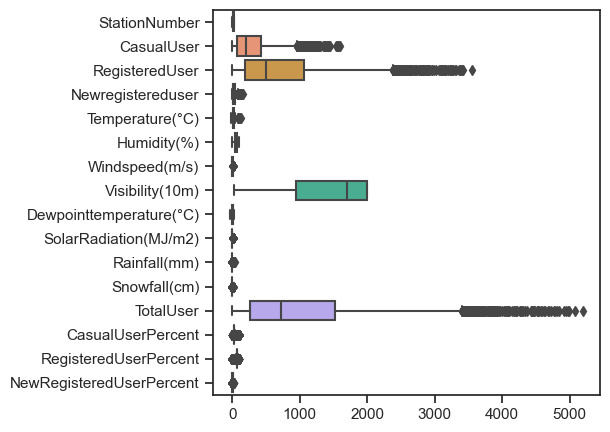

In [248]:
# Box plot to see the outliers of each numerical column
sns.boxplot(data=df,orient="h")

### Discussion:
> There are some unrealistic values in `Temperature` and `Humidity`. I want to explore it first.

## Temperature

### Interquartile Range

In [249]:
# Calculate the q1 and q3 and then the iqr
q1_Temperature = df['Temperature(°C)'].quantile(.25)
q3_Temperature = df['Temperature(°C)'].quantile(.75)
iqr_Temperature = q3_Temperature - q1_Temperature

print("q1_Temperature:", q1_Temperature, "\n")
print("q3_Temperature:", q3_Temperature, "\n")
print("iqr_Temperature:", iqr_Temperature)

q1_Temperature: 3.5 

q3_Temperature: 22.6 

iqr_Temperature: 19.1


### Descriptive statistics for Variability

In [250]:
# look at the Temperature mean
Temperature_mean = df['Temperature(°C)'].mean()
print("Temperature_mean:", Temperature_mean)
# look at the Temperature median
Temperature_median = df['Temperature(°C)'].median()
print("Temperature_median:", Temperature_median)
# look at the Temperature mode
Temperature_mode = df['Temperature(°C)'].mode().values[0]
print("Temperature_mode:", Temperature_mode)

Temperature_mean: 12.99365296803654
Temperature_median: 13.8
Temperature_mode: 19.1


(0.0, 2000.0)

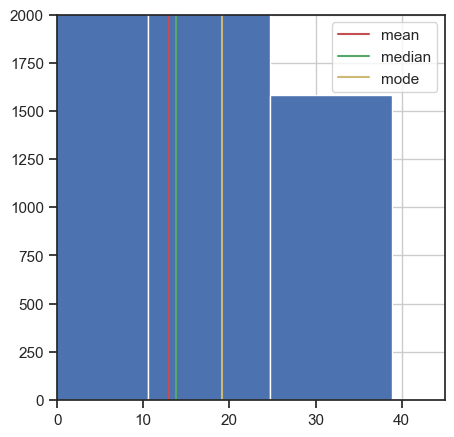

In [251]:
# plot the histogram with mean, median, and mode included

df['Temperature(°C)'].hist()

plt.axvline(Temperature_mean, color='r', label='mean')
plt.axvline(Temperature_median, color='g', label='median')
plt.axvline(Temperature_mode, color='y', label='mode')

plt.legend()

plt.xlim(0, 45)
plt.ylim(0, 2000)

### Discussion:
> - The mean lower than the median indicates that the data is skewed to the right.
> - Moreover, it is impossible for the `Temperature(°C)` to have the value is higher than the world highest record for Temperature [[1](#Link1)]. Therefore, there are outliers in this features.

## Humidity
*****
### Interquartile Range

In [252]:
# calculate the q1 and q3 and then the iqr
q1_Humidity = df['Humidity(%)'].quantile(.25)
q3_Humidity = df['Humidity(%)'].quantile(.75)
iqr_Humidity = q3_Humidity - q1_Humidity

print("q1_Humidity:", q1_Humidity, "\n")
print("q3_Humidity:", q3_Humidity, "\n")
print("iqr_Humidity:", iqr_Humidity)

q1_Humidity: 42.0 

q3_Humidity: 74.0 

iqr_Humidity: 32.0


### Descriptive statistics for Variability

In [253]:
# look at the Humidity mean
Humidity_mean = df['Humidity(%)'].mean()
print("Humidity_mean:", Humidity_mean)
# look at the Humidity median
Humidity_median = df['Humidity(%)'].median()
print("Humidity_median:", Humidity_median)
# look at the Humidity mode
Humidity_mode = df['Humidity(%)'].mode().values[0]
print("Humidity_mode:", Humidity_mode)

Humidity_mean: 58.226255707762554
Humidity_median: 57.0
Humidity_mode: 53


(0.0, 1600.0)

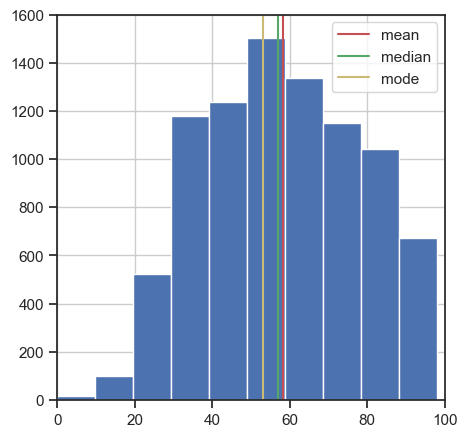

In [254]:
# plot the histogram with mean, median, and mode included
df['Humidity(%)'].hist()

plt.axvline(Humidity_mean, color='r', label='mean')
plt.axvline(Humidity_median, color='g', label='median')
plt.axvline(Humidity_mode, color='y', label='mode')

plt.legend()

plt.xlim(0, 100)
plt.ylim(0, 1600)

### Discussion:
****
> - The mean larger than the median indicates that the data is skewed to the left.
> - Moreover, it is impossible for the `Humidity(%)` to have the value is higher than the world highest record for Humidity [[2](#Link2)]. Therefore, there are outliers in this features.

<a id="3.1.2"></a>
## 3.1.2 Detecting and Dealing with outliers

In [255]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`Temperature(°C)` column**

<AxesSubplot:>

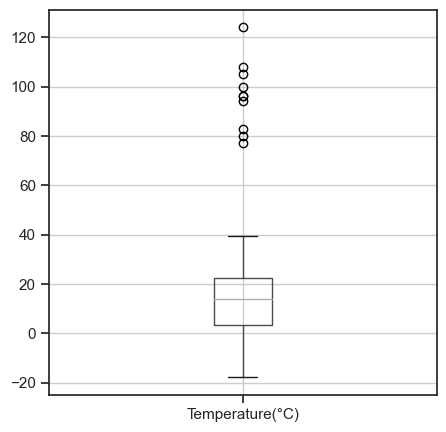

In [256]:
df.boxplot(column= "Temperature(°C)")

In [257]:
outliers, upper, lower = detect_outliers_IQR(df['Temperature(°C)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 10
max outlier value: 124.0
min of outliers: 77.0
Percentage of outliers: 0.1141552511415525


### Discussion:
****
The percentage of outliers in `Temperature(°C)` is extremely small so that I want to drop them since those values of are impossible

In [258]:
df.drop(upper[0], inplace = True)

> **`Humidity(%)` column**

<AxesSubplot:>

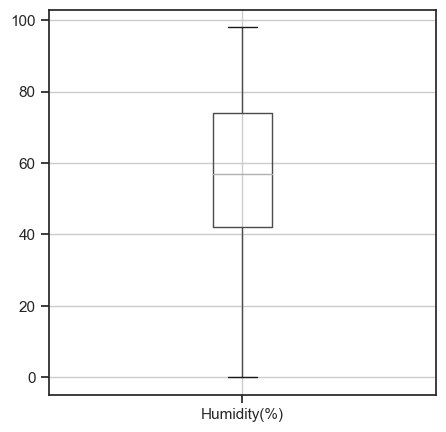

In [259]:
df.boxplot(column= "Humidity(%)")

In [260]:
outliers, upper, lower = detect_outliers_IQR(df['Humidity(%)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### Discussion:
****
Although `Humidity` have some values that might seem to be impossible, but there is no outliers

## CasualUser

In [261]:
outliers, upper, lower = detect_outliers_IQR(df['CasualUser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 200
max outlier value: 1599.0
min of outliers: 958.0
Percentage of outliers: 2.2857142857142856


In [262]:
extreme_temp = df[(df['CasualUser'] < outliers.min()) | (df['CasualUser'] > outliers.max())]
extreme_temp.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
0,1,2017-01-12 00:00:00,80.0,254,5,-5.2,37,2.2,2000,-17.6,...,Winter,Yes,339.0,23.598820,74.926254,1.474926,Yes,Yes,Yes,No
1,2,2017-01-12 00:00:00,79.0,204,6,-5.5,38,0.8,2000,-17.6,...,Winter,Yes,289.0,27.335640,70.588235,2.076125,Yes,Yes,Yes,No
2,3,2017-01-12 00:00:00,81.0,173,8,-6.0,39,1.0,2000,-17.7,...,Winter,Yes,262.0,30.916031,66.030534,3.053435,Yes,Yes,Yes,No
3,4,2017-01-12 00:00:00,48.0,107,3,-6.2,40,0.9,2000,-17.6,...,Winter,Yes,158.0,30.379747,67.721519,1.898734,Yes,Yes,Yes,No
4,5,2017-01-12 00:00:00,30.0,78,3,-6.0,36,2.3,2000,-18.6,...,Winter,Yes,111.0,27.027027,70.270270,2.702703,Yes,Yes,Yes,No


### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## RegisteredUser

In [263]:
outliers, upper, lower = detect_outliers_IQR(df['RegisteredUser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 155
max outlier value: 3556
min of outliers: 2379
Percentage of outliers: 1.7714285714285714


In [264]:
extreme_temp = df[(df['RegisteredUser'] < outliers.min()) | (df['RegisteredUser'] > outliers.max())]
extreme_temp.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
0,1,2017-01-12 00:00:00,80.0,254,5,-5.2,37,2.2,2000,-17.6,...,Winter,Yes,339.0,23.598820,74.926254,1.474926,Yes,Yes,Yes,No
1,2,2017-01-12 00:00:00,79.0,204,6,-5.5,38,0.8,2000,-17.6,...,Winter,Yes,289.0,27.335640,70.588235,2.076125,Yes,Yes,Yes,No
2,3,2017-01-12 00:00:00,81.0,173,8,-6.0,39,1.0,2000,-17.7,...,Winter,Yes,262.0,30.916031,66.030534,3.053435,Yes,Yes,Yes,No
3,4,2017-01-12 00:00:00,48.0,107,3,-6.2,40,0.9,2000,-17.6,...,Winter,Yes,158.0,30.379747,67.721519,1.898734,Yes,Yes,Yes,No
4,5,2017-01-12 00:00:00,30.0,78,3,-6.0,36,2.3,2000,-18.6,...,Winter,Yes,111.0,27.027027,70.270270,2.702703,Yes,Yes,Yes,No


### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## Newregistereduser

**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `Newregistereduser` in four seasons have the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `Newregistereduser` in four seasons have different means.

**Significance level** = 0.05

In [265]:
outliers, upper, lower = detect_outliers_IQR(df['Newregistereduser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 256
max outlier value: 159
min of outliers: 78
Percentage of outliers: 2.9257142857142857


In [266]:
extreme_temp = df[(df['Newregistereduser'] < outliers.min()) | (df['Newregistereduser'] > outliers.max())]
extreme_temp.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
0,1,2017-01-12 00:00:00,80.0,254,5,-5.2,37,2.2,2000,-17.6,...,Winter,Yes,339.0,23.598820,74.926254,1.474926,Yes,Yes,Yes,No
1,2,2017-01-12 00:00:00,79.0,204,6,-5.5,38,0.8,2000,-17.6,...,Winter,Yes,289.0,27.335640,70.588235,2.076125,Yes,Yes,Yes,No
2,3,2017-01-12 00:00:00,81.0,173,8,-6.0,39,1.0,2000,-17.7,...,Winter,Yes,262.0,30.916031,66.030534,3.053435,Yes,Yes,Yes,No
3,4,2017-01-12 00:00:00,48.0,107,3,-6.2,40,0.9,2000,-17.6,...,Winter,Yes,158.0,30.379747,67.721519,1.898734,Yes,Yes,Yes,No
4,5,2017-01-12 00:00:00,30.0,78,3,-6.0,36,2.3,2000,-18.6,...,Winter,Yes,111.0,27.027027,70.270270,2.702703,Yes,Yes,Yes,No


### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## Windspeed

In [267]:
df_Windspeed_q_low = df["Windspeed(m/s)"].quantile(0.02)
df_Windspeed_q_hi  = df["Windspeed(m/s)"].quantile(0.99)

df_filtered = df[(df["Windspeed(m/s)"] > df_Windspeed_q_hi) | (df["Windspeed(m/s)"] < df_Windspeed_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

2.262857142857143


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
84,13,2017-04-12 00:00:00,89.318182,393,11,-0.3,38,4.8,1823,-12.9,...,Winter,Yes,493.318182,18.105593,79.664609,2.229798,Yes,Yes,Yes,No
85,14,2017-04-12 00:00:00,97.750000,391,11,0.0,30,5.4,1938,-15.5,...,Winter,Yes,499.750000,19.559780,78.239120,2.201101,Yes,No,Yes,No
87,16,2017-04-12 00:00:00,87.435897,341,9,-0.1,25,5.8,2000,-17.8,...,Winter,Yes,437.435897,19.988277,77.954279,2.057444,Yes,Yes,Yes,No
89,18,2017-04-12 00:00:00,128.750000,515,11,-1.3,26,5.3,2000,-18.3,...,Winter,Yes,654.750000,19.663994,78.655976,1.680031,Yes,Yes,Yes,No
107,12,2017-05-12 00:00:00,87.894737,334,6,-3.9,25,0.0,1959,-21.0,...,Winter,Yes,427.894737,20.541205,78.056581,1.402214,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,3,13/11/2018,128.000000,330,12,5.6,64,0.1,1556,-0.6,...,Autumn,Yes,470.000000,27.234043,70.212766,2.553191,Yes,No,No,No
8331,4,13/11/2018,64.000000,205,5,5.3,62,0.0,1485,-1.4,...,Autumn,Yes,274.000000,23.357664,74.817518,1.824818,Yes,No,No,No
8332,5,13/11/2018,51.000000,133,4,4.9,63,0.0,1397,-1.5,...,Autumn,Yes,188.000000,27.127660,70.744681,2.127660,Yes,No,No,No
8333,6,13/11/2018,67.000000,162,5,4.7,72,0.0,1310,0.0,...,Autumn,Yes,234.000000,28.632479,69.230769,2.136752,Yes,No,No,No


### Discussion:
****
The windspeed seem to have some influences on the number of user since when the number of `Windspeed` = 0 then the number of users are higher than the `Windspeed` is high.

## Visibility

<AxesSubplot:>

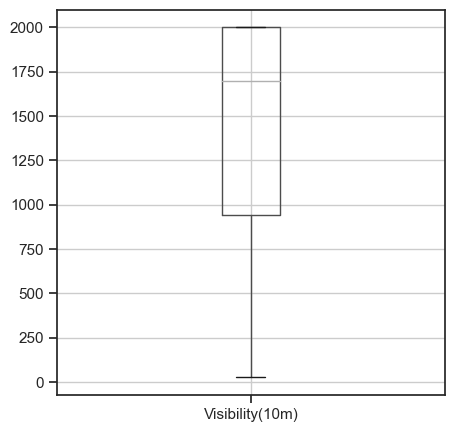

In [268]:
df.boxplot(column= "Visibility(10m)")

In [269]:
outliers, upper, lower = detect_outliers_IQR(df['Visibility(10m)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### Discussion:
****
There is so outlier in `Visibility`

## Dewpointtemperature

In [270]:
df_Dewpointtemperature_q_low = df["Dewpointtemperature(°C)"].quantile(0.02)
df_Dewpointtemperature_q_hi  = df["Dewpointtemperature(°C)"].quantile(0.99)

df_filtered = df[(df["Dewpointtemperature(°C)"] > df_Dewpointtemperature_q_hi) | 
                 (df["Dewpointtemperature(°C)"] < df_Dewpointtemperature_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

2.9485714285714284


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
613,14,26/12/2017,114.0,262,10,-2.0,15,4.7,1970,-25.2,...,Winter,Yes,386.0,29.533679,67.875648,2.590674,Yes,Yes,Yes,No
615,16,26/12/2017,88.0,246,7,-1.9,17,5.0,2000,-23.7,...,Winter,Yes,341.0,25.806452,72.140762,2.052786,Yes,Yes,Yes,No
616,17,26/12/2017,133.0,282,9,-1.9,17,3.3,2000,-23.7,...,Winter,Yes,424.0,31.367925,66.509434,2.122642,Yes,Yes,Yes,No
617,18,26/12/2017,138.0,350,10,-3.6,20,3.7,2000,-23.3,...,Winter,Yes,498.0,27.710843,70.281124,2.008032,Yes,Yes,Yes,No
633,10,27/12/2017,133.0,279,10,-9.8,33,2.0,1997,-23.0,...,Winter,Yes,422.0,31.516588,66.113744,2.369668,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2,13/08/2018,75.0,231,5,28.2,88,0.2,929,26.0,...,Summer,Yes,311.0,24.115756,74.276527,1.607717,No,No,No,No
6123,4,13/08/2018,76.0,196,5,27.7,88,0.5,833,25.5,...,Summer,Yes,277.0,27.436823,70.758123,1.805054,Yes,No,No,No
6124,5,13/08/2018,49.0,151,4,27.1,91,0.9,585,25.4,...,Summer,Yes,204.0,24.019608,74.019608,1.960784,Yes,No,No,No
6125,6,13/08/2018,72.0,230,6,26.8,90,0.6,591,25.0,...,Summer,Yes,308.0,23.376623,74.675325,1.948052,Yes,No,No,No


### Discussion:
****
The `Dewpointtemperature` seem to have some influences on the number of user since when the number of `Dewpointtemperature` < 0 then the number of users are lower than the `Dewpointtemperature` is high.

## SolarRadiation

In [271]:
df_SolarRadiation_q_low = df["SolarRadiation(MJ/m2)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["SolarRadiation(MJ/m2)"].quantile(0.99)

df_filtered = df[(df["SolarRadiation(MJ/m2)"] > df_SolarRadiation_q_hi) | 
                 (df["SolarRadiation(MJ/m2)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.9714285714285713


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
2989,14,2018-04-04 00:00:00,339.0,951,22,16.7,47,1.4,2000,5.3,...,Spring,Yes,1312.0,25.838415,72.484756,1.676829,Yes,No,No,No
3157,14,2018-11-04 00:00:00,1.0,0,0,15.6,38,4.7,1558,1.3,...,Spring,No,1.0,100.000000,0.000000,0.000000,Yes,No,No,No
3181,14,2018-12-04 00:00:00,440.0,1029,44,18.1,18,5.1,1939,-6.6,...,Spring,Yes,1513.0,29.081295,68.010575,2.908130,Yes,No,No,No
3277,14,16/04/2018,370.0,973,26,16.6,30,2.3,1876,-1.0,...,Spring,Yes,1369.0,27.027027,71.073776,1.899196,Yes,No,No,No
3325,14,18/04/2018,459.0,975,32,17.7,16,2.8,1824,-8.4,...,Spring,Yes,1466.0,31.309686,66.507503,2.182810,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,13,16/08/2018,242.0,668,17,34.5,44,2.2,2000,20.4,...,Summer,Yes,927.0,26.105717,72.060410,1.833873,Yes,No,No,No
6205,14,16/08/2018,293.0,652,26,35.1,39,2.0,2000,19.0,...,Summer,Yes,971.0,30.175077,67.147271,2.677652,Yes,No,No,No
6229,14,17/08/2018,339.0,820,30,31.3,30,2.1,2000,11.6,...,Summer,Yes,1189.0,28.511354,68.965517,2.523129,Yes,No,No,No
6230,15,17/08/2018,358.0,791,32,32.7,27,2.0,1964,11.2,...,Summer,Yes,1181.0,30.313294,66.977138,2.709568,Yes,No,No,No


### Discussion:
****
There is no clear relationship between the `SolarRadiation` and number of users

## Rainfall

In [272]:
df_SolarRadiation_q_low = df["Rainfall(mm)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["Rainfall(mm)"].quantile(0.99)

df_filtered = df[(df["Rainfall(mm)"] > df_SolarRadiation_q_hi) | 
                 (df["Rainfall(mm)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.9028571428571429


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
561,10,24/12/2017,4.0,3,0,4.6,94,0.9,90,3.7,...,Winter,Yes,7.0,57.142857,42.857143,0.000000,No,No,Yes,No
564,13,24/12/2017,6.0,4,0,4.1,91,0.8,404,2.7,...,Winter,Yes,10.0,60.000000,40.000000,0.000000,No,No,Yes,No
2151,16,28/02/2018,4.0,7,0,4.8,87,2.9,312,2.8,...,Winter,Yes,11.0,36.363636,63.636364,0.000000,No,No,No,No
2154,19,28/02/2018,2.0,11,0,3.6,90,2.1,845,2.1,...,Winter,Yes,13.0,15.384615,84.615385,0.000000,No,No,No,No
2157,22,28/02/2018,3.0,10,0,2.4,95,2.5,1349,1.6,...,Winter,Yes,13.0,23.076923,76.923077,0.000000,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,16,2018-08-11 00:00:00,25.0,56,1,11.4,96,2.0,910,10.7,...,Autumn,Yes,82.0,30.487805,68.292683,1.219512,No,No,No,No
8226,19,2018-08-11 00:00:00,7.0,40,0,12.9,97,0.0,406,12.4,...,Autumn,Yes,47.0,14.893617,85.106383,0.000000,No,No,No,No
8229,22,2018-08-11 00:00:00,6.0,21,0,14.0,96,4.1,292,13.3,...,Autumn,Yes,27.0,22.222222,77.777778,0.000000,No,No,No,No
8232,1,2018-09-11 00:00:00,7.0,0,0,12.0,96,3.1,1185,11.3,...,Autumn,No,7.0,100.000000,0.000000,0.000000,No,No,No,No


### Discussion:
****
There is no clear relationship between the `Rainfall` and number of users

## Snowfall

In [273]:
df_SolarRadiation_q_low = df["Snowfall(cm)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["Snowfall(cm)"].quantile(0.99)

df_filtered = df[(df["Snowfall(cm)"] > df_SolarRadiation_q_hi) | 
                 (df["Snowfall(cm)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.9942857142857142


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),...,Seasons,OperationDay,TotalUser,CasualUserPercent,RegisteredUserPercent,NewRegisteredUserPercent,CompletelyDry,Below0,IsDec2017,IsJun2018
222,7,2017-10-12 00:00:00,1.956522,9,5,-0.5,90,0.9,91,-1.9,...,Winter,Yes,15.956522,12.261580,56.403270,31.335150,No,Yes,Yes,No
223,8,2017-10-12 00:00:00,4.878049,20,1,-0.4,92,1.1,121,-1.5,...,Winter,Yes,25.878049,18.850141,77.285580,3.864279,No,Yes,Yes,No
224,9,2017-10-12 00:00:00,8.974359,35,2,-0.2,90,1.2,378,-1.6,...,Winter,Yes,45.974359,19.520357,76.129392,4.350251,No,Yes,Yes,No
225,10,2017-10-12 00:00:00,9.117647,31,4,0.2,90,1.0,305,-1.2,...,Winter,Yes,44.117647,20.666667,70.266667,9.066667,No,No,Yes,No
226,11,2017-10-12 00:00:00,5.937500,19,3,0.5,91,0.4,143,-0.8,...,Winter,Yes,27.937500,21.252796,68.008949,10.738255,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,6,25/11/2018,34.000000,88,2,2.1,94,0.4,248,1.2,...,Autumn,Yes,124.000000,27.419355,70.967742,1.612903,No,No,No,No
8622,7,25/11/2018,24.000000,75,1,1.7,95,0.7,220,0.9,...,Autumn,Yes,100.000000,24.000000,75.000000,1.000000,No,No,No,No
8623,8,25/11/2018,61.000000,142,5,1.3,96,0.9,198,0.7,...,Autumn,Yes,208.000000,29.326923,68.269231,2.403846,No,No,No,No
8624,9,25/11/2018,117.000000,250,10,1.4,96,1.0,212,0.8,...,Autumn,Yes,377.000000,31.034483,66.312997,2.652520,No,No,No,No


### Discussion:
****
There is no clear relationship between the `Snowfall` and number of users

<a id="3.2"></a>
## 3.2 Analysis for Research Questions
****

<a id="3.2.1"></a>
### 3.2.1 RQ1. Which weather factor(s) most likely affect the number of e-scooter rentees?
****

### Correlation between `Temperature` and `TotalUser`:
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `TotalUser`  are correlated.

**Significance level** = 0.05

In [274]:
stats.pearsonr(df['TotalUser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5392749424031467, pvalue=0.0)

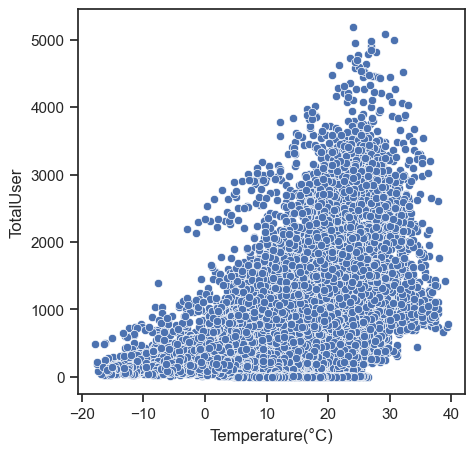

In [275]:
sns.scatterplot(x="Temperature(°C)", y="TotalUser", data=df);

### Discussion:
****
`Temperature` and `TotalUser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therfore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.539.

### Correlation between `Humidity` and `TotalUser`:
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `TotalUser` are correlated.

**Significance level** = 0.05

In [276]:
stats.pearsonr(df['TotalUser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.19779007923186678, pvalue=6.708536037979973e-78)

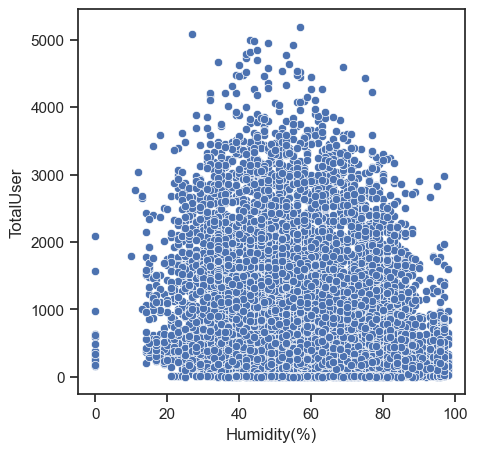

In [277]:
sns.scatterplot(x="Humidity(%)", y="TotalUser", data=df);

### Discussion:
****
`Humidity` and `TotalUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.198.

### Correlation between `Windspeed` and `TotalUser`:
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Windspeed` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `TotalUser` are correlated.

**Significance level** = 0.05

In [278]:
stats.pearsonr(df['TotalUser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.12017919733501264, pvalue=1.628191773492102e-29)

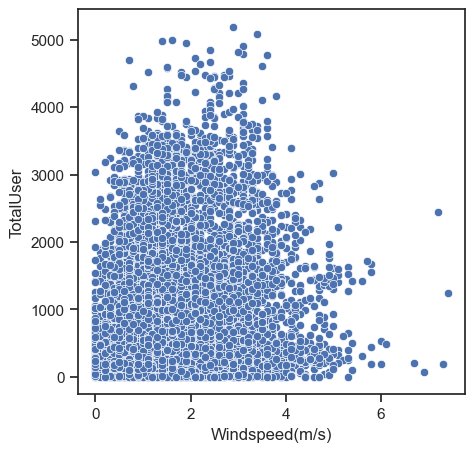

In [279]:
sns.scatterplot(x="Windspeed(m/s)", y="TotalUser", data=df);

### Discussion:
****
`Windspeed` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.120.

### Correlation between `Visibility` and `TotalUser`:
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Visibility` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `TotalUser` are correlated.

**Significance level** = 0.05

In [280]:
stats.pearsonr(df['TotalUser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.1966548193062197, pvalue=5.1781840308660615e-77)

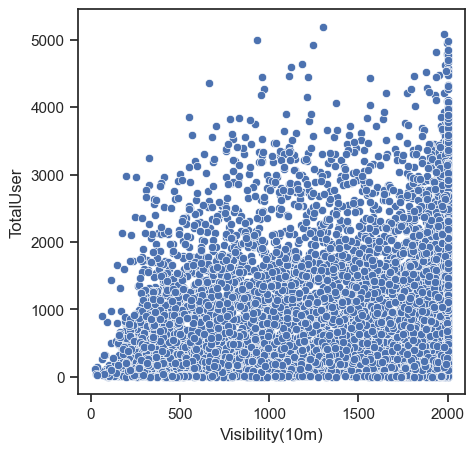

In [281]:
sns.scatterplot(x="Visibility(10m)", y="TotalUser", data=df);

### Discussion:
****
`Visibility` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.197.

### Correlation between `Dewpointtemperature` and `TotalUser`:
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `DewPointTemperature` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `DewPointTemperature` and `TotalUser` are correlated.

**Significance level** = 0.05

In [282]:
stats.pearsonr(df['TotalUser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.38090845431375475, pvalue=3.6889172092605124e-300)

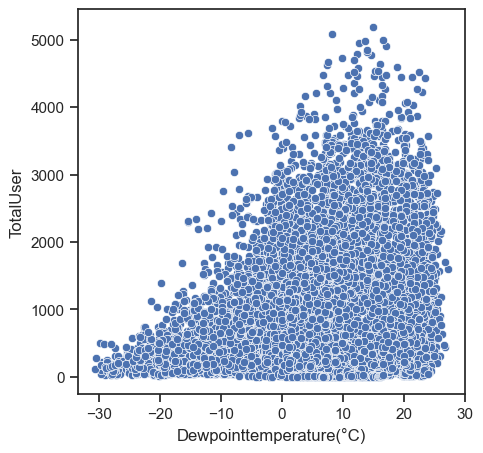

In [283]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="TotalUser", data=df);

### Discussion:
****
`Dewpointtemperature` and `TotalUser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.381.

### Correlation between `SolarRadiation` and `TotalUser`:
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation`and `TotalUser` are correlated.

**Significance level** = 0.05

In [284]:
stats.pearsonr(df['TotalUser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.26143375780127354, pvalue=1.0703045741383986e-136)

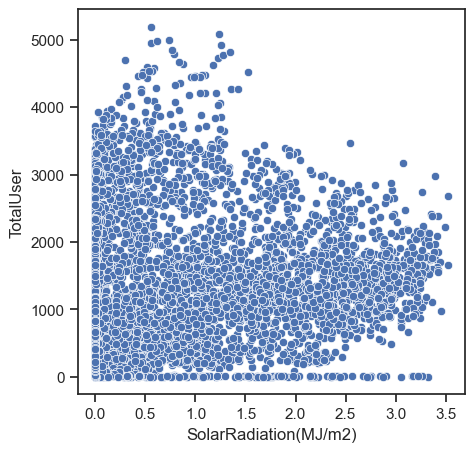

In [285]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="TotalUser", data=df);

### Discussion:
****
`SolarRadiation` and `TotalUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.261.


### Correlation between `Rainfall` and `TotalUser`:
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Rainfall` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `TotalUser` are correlated.

**Significance level** = 0.05

In [286]:
stats.pearsonr(df['TotalUser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.12248067401187565, pvalue=1.3392301488629682e-30)

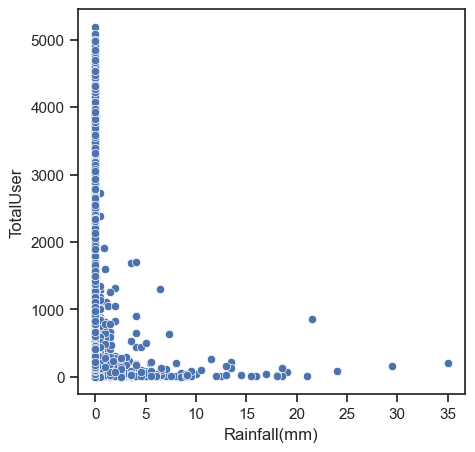

In [287]:
sns.scatterplot(x="Rainfall(mm)", y="TotalUser", data=df);

### Discussion:
****
`Rainfall` and `TotalUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.122.

### Correlation between `Snowfall` and `TotalUser`:
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Snowfall` and `TotalUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `TotalUser` are correlated.

**Significance level** = 0.05

In [288]:
stats.pearsonr(df['TotalUser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.140354018552346, pvalue=9.706049292735327e-40)

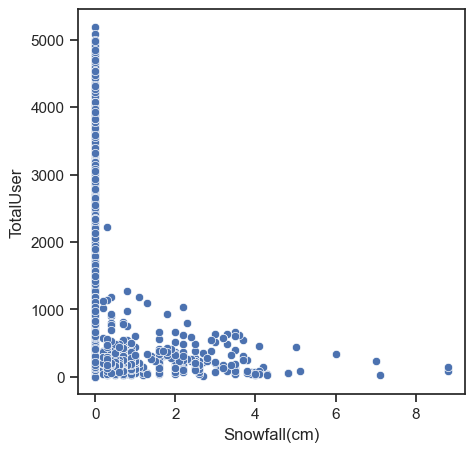

In [289]:
sns.scatterplot(x="Snowfall(cm)", y="TotalUser", data=df);

### Discussion:
****
`Snowfall` and `TotalUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.140.

<a id="3.2.2"></a>
### 3.2.2. RQ2: Is there a relationship between Temperature and Dew Point Temperature?
****

**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `Dewpointtemperature` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `Dewpointtemperature`are correlated.

**Significance level** = 0.05

In [290]:
stats.pearsonr(df['Temperature(°C)'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.9127976489794506, pvalue=0.0)

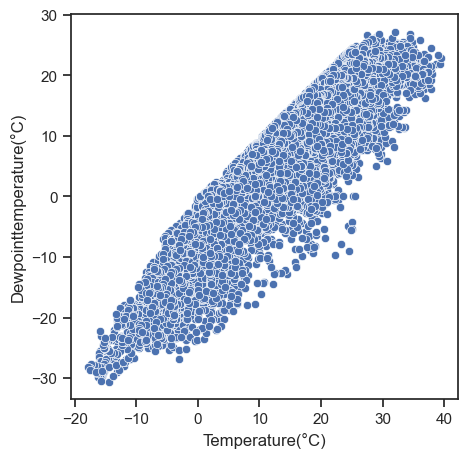

In [291]:
sns.scatterplot(x="Temperature(°C)", y="Dewpointtemperature(°C)", data=df);

### Discussion:
****
`Temperature` and `Dewpointtemperature` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.913.

<a id="3.2.3"></a>
### 3.2.3. RQ3: Which season are people most/least likely to rent an e-scooter?
****

### Levene's Test for Homogeneity of Variance

In [292]:
stats.levene(df['TotalUser'][df['Seasons'] == 'Autumn'],
             df['TotalUser'][df['Seasons'] == 'Spring'],
             df['TotalUser'][df['Seasons'] == 'Summer'],
             df['TotalUser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=696.4275477222299, pvalue=0.0)

### Discussion:
****
The Levene's test on four groups of `Seasons` shows significance. The null hypothesis for the Levene's test is ***REJECTED*** since the p-value is less than the significance level (0.05) and infer that at least one pair of groups has uneven variance. Therefore, the traditional ANOVA method to compare the means of four `Seasons` groups cannot be used. A non-parametric version of ANOVA, the Welch's ANOVA will be used instead, since Welch's ANOVA does not assume homogeneity of variance between groups. The same reason for why Games-Howell post-hoc test is used in place of of Tukey HSD.

**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `TotalUser` in four seasons have the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `TotalUser` in four seasons have different means.

**Significance level** = 0.05

In [293]:
pg.welch_anova(dv='TotalUser', between='Seasons', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Seasons,3,3985.332533,1854.376926,0.0,0.211406


### Discussion:
****
The p-value from the Welch's ANOVA test is less than the significance level (0.05), therefore $H_0$ that says all seasons have the same mean is ***REJECTED***. However, the test did not point out which season is different from the others. The Games-Howell post-hoc test is conducted to see which season has a different mean.

In [294]:
pg.pairwise_gameshowell(dv='TotalUser', between='Seasons', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Autumn,Spring,1174.162088,1046.014040,128.148048,27.664993,4.632137,4377.461281,2.209629e-05,0.139802
1,Autumn,Summer,1174.162088,1481.834239,-307.672151,29.164210,-10.549648,4378.403369,0.000000e+00,-0.318215
2,Autumn,Winter,1174.162088,311.889928,862.272160,20.531358,41.997815,2405.184500,0.000000e+00,1.266685
3,Spring,Summer,1046.014040,1481.834239,-435.820199,28.526730,-15.277608,4366.141196,1.779132e-12,-0.459724
4,Spring,Winter,1046.014040,311.889928,734.124111,19.615296,37.426103,2454.069786,0.000000e+00,1.120322
5,Summer,Winter,1481.834239,311.889928,1169.944311,21.678541,53.967852,2407.489459,2.958744e-13,1.615082


### Discussion:
****
From the Games-Howell post-hoc test, the pair-wise comparison between four groups all give p-values less than the significance level (0.05). Hence, the $H_0$ is ***REJECTED***. The number of e-scooter rentees differs in all four seasons. Summer has the highest mean of `TotalUser`, and Winter has the lowest mean of `TotalUser`. Therefore, most people would rent an e-scooter in Summer, and the least amount of people would rent an e-scooter in Winter.

<a id="3.2.4"></a>
### 3.2.4.  RQ4: Which station has the most/least e-scooter rent in a single day?
****

### Levene's Test for Homogeneity of Variance

In [295]:
stats.levene(df['TotalUser'][df['StationNumber'] == 1],
             df['TotalUser'][df['StationNumber'] == 2],
             df['TotalUser'][df['StationNumber'] == 3],
             df['TotalUser'][df['StationNumber'] == 4],
             df['TotalUser'][df['StationNumber'] == 5],
             df['TotalUser'][df['StationNumber'] == 6],
             df['TotalUser'][df['StationNumber'] == 7],
             df['TotalUser'][df['StationNumber'] == 8],
             df['TotalUser'][df['StationNumber'] == 9],
             df['TotalUser'][df['StationNumber'] == 10],
             df['TotalUser'][df['StationNumber'] == 11],
             df['TotalUser'][df['StationNumber'] == 12],
             df['TotalUser'][df['StationNumber'] == 13],
             df['TotalUser'][df['StationNumber'] == 14],
             df['TotalUser'][df['StationNumber'] == 15],
             df['TotalUser'][df['StationNumber'] == 16],
             df['TotalUser'][df['StationNumber'] == 17],
             df['TotalUser'][df['StationNumber'] == 18],
             df['TotalUser'][df['StationNumber'] == 19],
             df['TotalUser'][df['StationNumber'] == 20],
             df['TotalUser'][df['StationNumber'] == 21],
             df['TotalUser'][df['StationNumber'] == 22],
             df['TotalUser'][df['StationNumber'] == 23],
             df['TotalUser'][df['StationNumber'] == 24],
            )

LeveneResult(statistic=253.70970410605364, pvalue=0.0)

### Discussion:
****
The Levene's test for on 24 groups of `StationNumber` shows significant. Hence, the homogeneity of variance assumption for ANOVA is violated. The Welch's ANOVA method with Games-Howell post-hoc test will be used instead.

**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `TotalUser` at all stations has the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `TotalUser` at different stations has different means.

**Significance level** = 0.05

In [296]:
pg.welch_anova(dv='TotalUser', between='StationNumber', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,StationNumber,23,3140.720638,344.400455,0.0,0.291106


### Discussion:
****
There is a mean difference of `TotalUser` between 24 stations because:
> - The p-value is smaller than the ***significance level (0.05)***, therefore $H_0$ is ***REJECTED***.

The Games-Howell post-hoc test is conducted too observe the mean difference between pairs of stations:

In [297]:
post_hoc = pg.pairwise_gameshowell(dv='TotalUser', between='StationNumber', data=df)
post_hoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,775.367322,607.760789,167.606533,35.093000,4.776067,683.899915,5.511823e-04,0.353897
1,1,3,775.367322,427.545645,347.821677,31.883108,10.909278,575.449159,0.000000e+00,0.808944
2,1,4,775.367322,286.924196,488.443127,29.693542,16.449473,468.127072,1.140199e-13,1.220537
3,1,5,775.367322,185.375139,589.992183,28.510890,20.693573,405.312457,1.176836e-13,1.536070
4,1,6,775.367322,195.062918,580.304404,28.609392,20.283703,410.562484,0.000000e+00,1.505592
...,...,...,...,...,...,...,...,...,...,...
271,21,23,1535.310835,1316.807743,218.503091,77.998775,2.801366,702.509488,4.378205e-01,0.207153
272,21,24,1535.310835,956.590393,578.720442,70.087838,8.257074,594.260075,2.371436e-13,0.610586
273,22,23,1477.202369,1316.807743,160.394626,75.481552,2.124951,714.857019,9.032775e-01,0.157134
274,22,24,1477.202369,956.590393,520.611976,67.275262,7.738535,614.606957,1.148903e-11,0.572242


In [298]:
max_a = post_hoc['mean(A)'].max() # Find station with highest mean in column A
max_b = post_hoc['mean(B)'].max() # Find station with highest mean in column B
post_hoc[post_hoc['mean(A)'] == max_a]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
261,19,20,2159.936204,1721.145623,438.790581,101.711866,4.314055,702.729743,4.228518e-03,0.319588
262,19,21,2159.936204,1535.310835,624.625369,98.600027,6.334941,682.156573,1.182269e-07,0.468934
263,19,22,2159.936204,1477.202369,682.733835,96.621017,7.066101,663.885607,1.112933e-09,0.523095
264,19,23,2159.936204,1316.807743,843.128461,92.536936,9.111264,615.225016,5.706546e-14,0.674605
265,19,24,2159.936204,956.590393,1203.345811,85.974303,13.996575,510.105284,0.000000e+00,1.036639


In [299]:
post_hoc[post_hoc['mean(B)'] == max_b]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
17,1,19,775.367322,2159.936204,-1384.568882,82.870135,-16.707694,452.818205,1.233458e-13,-1.236702
39,2,19,607.760789,2159.936204,-1552.175415,81.026541,-19.156383,417.986536,1.464384e-13,-1.419200
60,3,19,427.545645,2159.936204,-1732.390559,79.688859,-21.739432,392.666736,7.283063e-14,-1.610705
80,4,19,286.924196,2159.936204,-1873.012009,78.838367,-23.757621,376.665264,1.476597e-13,-1.760336
99,5,19,185.375139,2159.936204,-1974.561065,78.400590,-25.185538,368.477757,0.000000e+00,-1.866195
117,6,19,195.062918,2159.936204,-1964.873286,78.436464,-25.050508,369.147213,2.396972e-13,-1.856185
134,7,19,407.941231,2159.936204,-1751.994974,79.885975,-21.931196,396.389274,1.757483e-13,-1.624892
150,8,19,869.292658,2159.936204,-1290.643546,86.270119,-14.960493,515.323404,2.950973e-13,-1.107800
165,9,19,1461.331858,2159.936204,-698.604347,97.212641,-7.186353,669.286744,4.911852e-10,-0.532137
179,10,19,924.582997,2159.936204,-1235.353207,83.696159,-14.759975,468.315955,1.488809e-13,-1.092951


### Station with highest `TotalUser`:
Station 19 has the highest mean of total e-scooter rentees (mean = 2160). The pair-wise comparison (Games-Howell post-hoc test) shows that Station 19's mean of `TotalUser` if different from all other stations (p-value < 0.05). Hence, it can be concluded that Station 19 has the most e-scooter rentees.

In [300]:
min_a = post_hoc['mean(A)'].min() # Find station with lowest mean in column A
min_b = post_hoc['mean(B)'].min() # Find station with lowest mean in column B
post_hoc[post_hoc['mean(A)'] == min_a]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
86,5,6,185.375139,195.062918,-9.687779,9.883852,-0.980162,725.593113,9.999990e-01,-0.072480
87,5,7,185.375139,407.941231,-222.566092,18.088132,-12.304537,480.082586,0.000000e+00,-0.909884
88,5,8,185.375139,869.292658,-683.917519,37.255134,-18.357672,387.876179,0.000000e+00,-1.360168
89,5,9,185.375139,1461.331858,-1275.956719,58.272713,-21.896299,372.975172,5.118128e-14,-1.622442
90,5,10,185.375139,924.582997,-739.207858,30.829509,-23.977283,399.858143,1.760814e-13,-1.776466
91,5,11,185.375139,750.043349,-564.668211,25.204549,-22.403424,420.527404,3.017586e-13,-1.656667
92,5,12,185.375139,855.438433,-670.063294,28.036066,-23.900047,409.111690,1.629807e-13,-1.767338
93,5,13,185.375139,999.812587,-814.437448,33.373423,-24.403774,394.242623,6.217249e-15,-1.808100
94,5,14,185.375139,1054.097037,-868.721898,35.601091,-24.401553,390.324029,1.485478e-13,-1.807960
95,5,15,185.375139,1083.948455,-898.573316,37.543822,-23.933986,388.549336,2.160494e-13,-1.769847


In [301]:
post_hoc[post_hoc['mean(B)'] == min_b]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
3,1,5,775.367322,185.375139,589.992183,28.510890,20.693573,405.312457,1.176836e-13,1.536070
25,2,5,607.760789,185.375139,422.385650,22.598935,18.690511,435.416206,5.917489e-14,1.382108
46,3,5,427.545645,185.375139,242.170506,17.196680,14.082399,493.798347,0.000000e+00,1.041352
66,4,5,286.924196,185.375139,101.549057,12.684624,8.005681,615.370449,1.944667e-12,0.591996


### Stations with lowest `TotalUser`:
Station 5 has the lowest mean of `TotalUser` (mean = 185). The pair-wise comparison (Games-Howell post-hoc test) shows that Station 5's mean of `TotalUser` is different from other stations (p-value < 0.05), except Station 6 (p-value = 0.99). Hence, it can be concluded that Station 5 and Station 6 has the lowest number of e-scooter rentees.

<a id="3.2.5"></a>
### 3.2.5.  RQ5: Does `Seasons` affect e-scooter stations' closure?
****

In [302]:
chi2table = pd.crosstab(df['Seasons'], df['OperationDay'])
chi2table

OperationDay,No,Yes
Seasons,,
Autumn,247,1937
Spring,48,2160
Summer,0,2208
Winter,0,2150


**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `OperationDay` is independent of `Seasons`.
> * **Alternative hypothesis ($H_1$)**: `OperationDay` is dependent on `Seasons`.

**Significance level** = 0.05

In [303]:
stats.chi2_contingency(chi2table)

(584.2133462356013,
 2.664716557182926e-126,
 3,
 array([[  73.632     , 2110.368     ],
        [  74.44114286, 2133.55885714],
        [  74.44114286, 2133.55885714],
        [  72.48571429, 2077.51428571]]))

### Discussion:
`Seasons` does affect whether a station is open or not because:
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. Most of the time the stations were closed during Autumn.

<a id="3.2.6"></a>
### 3.2.6.  RQ6: Are people more likely to rent an e-scooter when the temperature is above 0°C?
****

### Levene's Test for Homogeneity of Variance
For this RQ, the means of `TotalUser` in two conditions are compared: when temperature is above 0°C and below 0°C. The independent t-test is used to compare two means. Since the t-test assume equal variance between two groups, the Levene's test is carried out to check the homogeneity of variance.

In [304]:
stats.levene(df['TotalUser'][df['Below0'] == 'Yes'], 
             df['TotalUser'][df['Below0'] == 'No'], )

LeveneResult(statistic=1375.4131268371218, pvalue=9.396357590649263e-280)

### Discussion:
****
The p-value of the Levene's test is less than the significance level of 0.05, which means the variance between two testing groups are not equal. Hence, the Welch's t-test is conducted because it does not assume homogeneity of variance. This t-test is also one-tailed to compare if one condition has higher mean than the other.

**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The mean of `TotalUser` when the temperature is below 0°C is NOT less than the mean of `TotalUser` when the temperature is above 0°C.
> * **Alternative hypothesis ($H_1$)**: The mean of `TotalUser` when the temperature is below 0°C is less than the mean of `TotalUser` when the temperature is above 0°C.

**Significance level** = 0.05

In [328]:
stats.ttest_ind(df['TotalUser'][df['Below0'] == 'Yes'], 
                df['TotalUser'][df['Below0'] == 'No'],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-70.40315736414858, pvalue=0.0)

### Discussion:
People tend to rent an e-scooter when the temperature is above 0°C because:
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The mean of `TotalUser` when the temperature is below 0°C is less than the mean of `TotalUser` when the temperature is above 0°C.

<a id="3.2.7"></a>
### 3.2.7.  RQ7: Are people more likely to rent an e-scooter on completely dry days (no rain, no snow)?
****

From the scatterplots in RQ1, 2, and 3, it looks like the number of e-scooter rentees decreases as `Rainfall` or `Snowfall` increases, and the amount of rentees seems extremely high there is no rain or snow. However, the correlation is not linear, therefore the Pearson correlation tests show very weak correlation between `Rainfall` or `Snowfall` and the number of users. Hence, this time, an independent t-test is carried out to see if people are more likely to rent an e-scooter on completely no rain and no snow days.

### Levene's Test for Homogeneity of Variance
A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `TotalUser` on days without rain/snow and `TotalUser` on days with rain/snow.

In [306]:
stats.levene(df['TotalUser'][df['CompletelyDry'] == 'Yes'],
             df['TotalUser'][df['CompletelyDry'] == 'No']
            )

LeveneResult(statistic=719.4165738038259, pvalue=2.303843517131762e-152)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted.

***Hypotheses:***
> * **Null hypothesis ($H_0$)** : The mean of `TotalUser` on dry (no rain, no snow) days is NOT less than the mean of `TotalUser` on days with rain or snow.
> * **Alternative hypothesis ($H_1$)**:  The mean of `TotalUser` on dry (no rain, no snow) days is less than the mean of `TotalUser` on days with rain or snow.

**Significance level:** 0.05

In [311]:
stats.ttest_ind(df['TotalUser'][df['CompletelyDry'] == 'Yes'], 
                df['TotalUser'][df['CompletelyDry'] == 'No'],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=56.84253060284808, pvalue=1.0)

### Discussion:
****
The mean of `TotalUser` who rented e-scooter is higher when there is no rain and snow on a given day because: 
> - p-value is higher than the ***significance level (0.05)***, therefore ***$H_0$ is NOT rejected***. People tends to rent more e-scooters on dry days without rain and snow.


<a id="3.2.8"></a>
### 3.2.8.  RQ8: Has the percentage of registered/newly registered user increase after 6 months (from Dec 2017 to Jun 2018)?
****

### Registered Users:

### Levene's Test for Homogeneity of Variance

In [336]:
stats.levene(df['RegisteredUserPercent'][df['IsDec2017'] == 'Yes'], 
             df['RegisteredUserPercent'][df['IsJun2018'] == 'Yes'])

LeveneResult(statistic=113.46522187510439, pvalue=1.457700574426362e-25)

In [338]:
stats.ttest_ind(df['RegisteredUserPercent'][df['IsDec2017'] == 'Yes'], 
                df['RegisteredUserPercent'][df['IsJun2018'] == 'Yes'],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=21.93894375694393, pvalue=1.0)

### Newly Registered Users:

### Levene's Test for Homogeneity of Variance

In [337]:
stats.levene(df['NewRegisteredUserPercent'][df['IsDec2017'] == 'Yes'], 
             df['NewRegisteredUserPercent'][df['IsJun2018'] == 'Yes'])

LeveneResult(statistic=67.69986737060182, pvalue=4.186617216533479e-16)

In [331]:
stats.ttest_ind(df['NewRegisteredUserPercent'][df['IsDec2017'] == 'Yes'], 
                df['NewRegisteredUserPercent'][df['IsJun2018'] == 'Yes'],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=3.2406307544919377, pvalue=0.9993785949748367)

<a id="3.2.9"></a>
### 3.2.9.  RQ9: Do unregistered rentees prefer to register or stay casual?
****

### Levene's Test for Homogeneity of Variance

In [339]:
stats.levene(df['CasualUser'], 
             df['Newregistereduser'])

LeveneResult(statistic=8448.966051989817, pvalue=0.0)

In [340]:
stats.ttest_ind(df['CasualUser'], 
                df['Newregistereduser'],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=90.0519944971573, pvalue=1.0)

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [World: Highest Temperature](https://wmo.asu.edu/content/world-highest-temperature)

<a id="Link2"></a>
- [2] [The Most Humid Cities In The World, Mapped](https://digg.com/nature/link/most-humid-cities-in-the-world-mapped-ocnm3EUU3n#:~:text=They%20scanned%20over%2018%2C000%20cities,Here's%20what%20they%20found.&text=The%20world's%20most%20humid%20city,neighboring%20countries%20Bangladesh%20and%20Myanmar.)

<a id="Link3"></a>
- [3] [Who is afraid of non-normal data? Choosing between parametric and non-parametric tests](https://eje.bioscientifica.com/view/journals/eje/182/2/EJE-19-0922.xml#:~:text=The%20t%2Dtest%20is%20not,distributions%20of%20the%20outcome%20variable.)